# **Defining the statistical model**

The next step is to specify the statistical model. 

$H(z)= H_0 \sqrt{\Omega_m (1+z)^3 +(1-\Omega_m)}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

z=np.array([0.07  , 0.09  , 0.12  , 0.17  , 0.179 , 0.199 , 0.2   , 0.27  ,
       0.28  , 0.352 , 0.3802, 0.4   , 0.4004, 0.4247, 0.4497, 0.47  ,
       0.4783, 0.48  , 0.5929, 0.6797, 0.7812, 0.8754, 0.88  , 0.9   ,
       1.037 , 1.3   , 1.363 , 1.43  , 1.53  , 1.75  , 1.965 ]);


hz= np.array([ 69. ,  69. ,  68.6,  83. ,  75. ,  75. ,  72.9,  77. ,  88.8,
        83. ,  83. ,  95. ,  77. ,  87.1,  92.8,  89. ,  80.9,  97. ,
       104. ,  92. , 105. , 125. ,  90. , 117. , 154. , 168. , 160. ,
       177. , 140. , 202. , 186.5])

shz=np.array([19.6, 12. , 26.2,  8. ,  4. ,  5. , 29.6, 14. , 36.6, 14. , 13.5,
       17. , 10.2, 11.2, 12.9, 34. ,  9. , 62. , 13. ,  8. , 12. , 17. ,
       40. , 23. , 20. , 17. , 33.6, 18. , 14. , 40. , 50.4])


Write a code for $\chi^2$ minimization and calculating log likelihood

In [6]:
# Model H(z)
def H_model(z, H0, Omega_m):
    return H0 * np.sqrt(Omega_m * (1 + z)**3 + (1 - Omega_m))

In [7]:
# Chi-squared function
def chi_squared(H0, Omega_m):
    model = H_model(z, H0, Omega_m)
    return np.sum(((hz - model) / shz)**2)

In [9]:
# Define grid
H0_vals = np.linspace(60, 80, 100)
Om_vals = np.linspace(0.1, 0.5, 100)

# Calculate chi-squared on grid
chi2_grid = np.zeros((len(H0_vals), len(Om_vals)))

for i, H0 in enumerate(H0_vals):
    for j, Om in enumerate(Om_vals):
        chi2_grid[i, j] = chi_squared(H0, Om)

i_best, j_best = np.unravel_index(np.argmin(chi2_grid), chi2_grid.shape)
H0_best = H0_vals[i_best]
Om_best = Om_vals[j_best]
min_chi2 = chi2_grid[i_best, j_best]

print(f"Best-fit H0 = {H0_best:.2f}")
print(f"Best-fit Omega_m = {Om_best:.3f}")
print(f"Minimum Chi^2 = {min_chi2:.2f}")

Best-fit H0 = 68.28
Best-fit Omega_m = 0.318
Minimum Chi^2 = 14.50


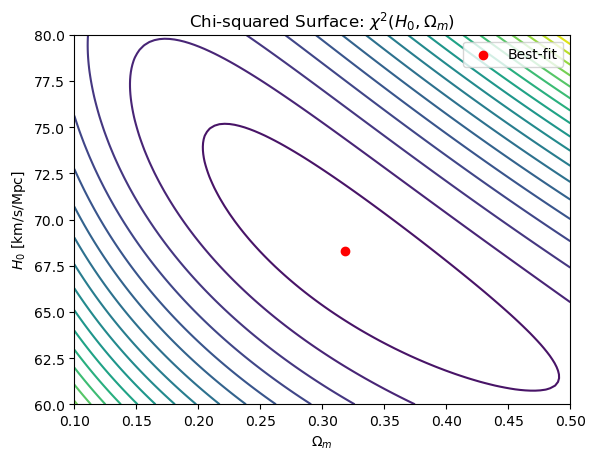

In [11]:
CS = plt.contour(Om_vals, H0_vals, chi2_grid, levels=20, cmap="viridis")
#plt.clabel(CS, inline=1, fontsize=10)
plt.xlabel(r"$\Omega_m$")
plt.ylabel(r"$H_0$ [km/s/Mpc]")
plt.title(r"Chi-squared Surface: $\chi^2(H_0, \Omega_m)$")
plt.scatter(Om_best, H0_best, color='red', label='Best-fit')
plt.legend()
plt.show()